In [1]:
import punk
help(punk)

Help on package punk:

NAME
    punk

PACKAGE CONTENTS
    feature_selection (package)
    novelty_detection (package)
    utils (package)

DATA
    __all__ = ['feature_selection', 'utils']

VERSION
    0.1.3dev1

FILE
    /home/alarcj/Documents/datasci/NewKnowledge/primitives_repo/CODE/examples/punk/__init__.py




In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import linalg

from sklearn.model_selection import train_test_split

from punk import feature_selection

# Feature Selection

## Feature Selection for Classification Problems

In [23]:
df_wine = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                      'python-machine-learning-book/master/code/datasets/wine/wine.data', 
                      header=None)    
columns = np.array(['Alcohol', 'Malic acid', 'Ash',
                    'Alcalinity of ash', 'Magnesium', 'Total phenols',
                    'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                    'Proline'])
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values            
X, _, y, _ = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
%%time
rfc = feature_selection.rf.rfclassifier_feature_selection(X, y)
print(rfc.keys())

dict_keys(['indices', 'feature_importances'])
CPU times: user 42.7 s, sys: 0 ns, total: 42.7 s
Wall time: 43.1 s


 1)        Color intensity         0.17600
 2)            Proline             0.16426
 3)           Flavanoids           0.14943
 4)  OD280/OD315 of diluted wines  0.14081
 5)            Alcohol             0.10759
 6)              Hue               0.07522
 7)         Total phenols          0.05475
 8)       Alcalinity of ash        0.03159
 9)           Malic acid           0.02552
10)        Proanthocyanins         0.02376
11)           Magnesium            0.02217
12)      Nonflavanoid phenols      0.01659
13)              Ash               0.01231


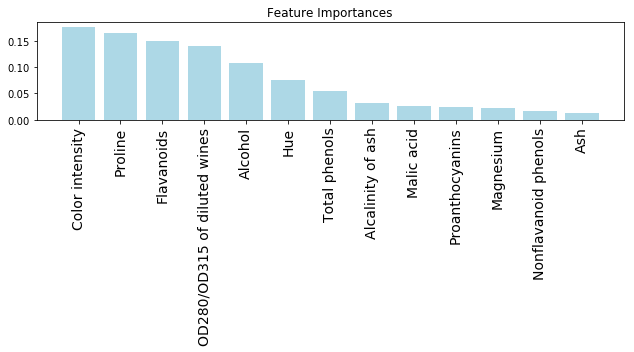

In [26]:
feature_importances = rfc["feature_importances"]
feature_indices = rfc["indices"]

for i in range(len(columns)):
    print("{:>2}) {:^30} {:.5f}".format(i+1, 
                                        columns[feature_indices[i]],
                                        feature_importances[feature_indices[i]]
                                       ))
    
plt.figure(figsize=(9, 5))
plt.title('Feature Importances')
plt.bar(range(len(columns)), feature_importances[feature_indices], color='lightblue', align='center')

plt.xticks(range(len(columns)), columns[feature_indices], rotation=90, fontsize=14)
plt.xlim([-1, len(columns)])
plt.tight_layout()
plt.savefig('./random_forest.png', dpi=300)
plt.show()

## Feature Selection for Regression Problems

In [27]:
from sklearn import datasets

In [29]:
boston = datasets.load_boston()
X, y = boston.data, boston.target

In [31]:
%%time

rfr = feature_selection.rfregressor_feature_selection(X, y)

CPU times: user 1min 51s, sys: 348 ms, total: 1min 51s
Wall time: 1min 53s


 1)               RM               0.43219
 2)             LSTAT              0.37294
 3)              DIS               0.06685
 4)              CRIM              0.03685
 5)              NOX               0.02356
 6)            PTRATIO             0.01672
 7)              TAX               0.01437
 8)              AGE               0.01310
 9)               B                0.01174
10)             INDUS              0.00596
11)              RAD               0.00383
12)               ZN               0.00102
13)              CHAS              0.00087


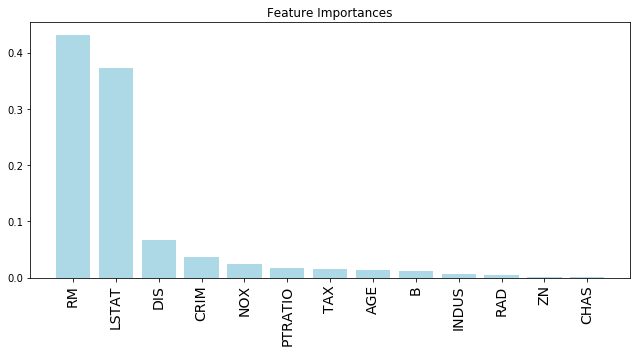

In [40]:
feature_importances = rfr["feature_importances"]
feature_indices = rfr["indices"]

columns = boston.feature_names
for i in range(len(columns)):
    print("{:>2}) {:^30} {:.5f}".format(i+1, 
                                        columns[feature_indices[i]],
                                        feature_importances[feature_indices[i]]
                                       ))
    
plt.figure(figsize=(9, 5))
plt.title('Feature Importances')
plt.bar(range(len(columns)), feature_importances[feature_indices], color='lightblue', align='center')

plt.xticks(range(len(columns)), columns[feature_indices], rotation=90, fontsize=14)
plt.xlim([-1, len(columns)])
plt.tight_layout()
plt.savefig('./random_forest.png', dpi=300)
plt.show()

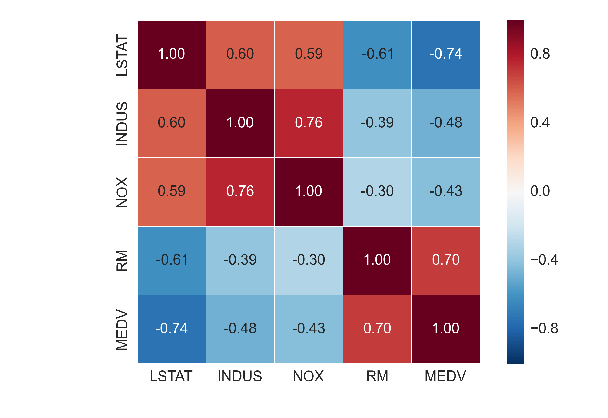

In [48]:
import matplotlib.image as mpimg

img=mpimg.imread("heatmap.png")
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(img);

# Novelty Detection - Dataset Summarization

## Testing Heteroscedasticity

In [4]:
from punk import novelty_detection

In [3]:
n_samples, n_features, rank = 1000, 50, 10
sigma = 1.
rng = np.random.RandomState(42)
U, _, _ = linalg.svd(rng.randn(n_features, n_features))
X = np.dot(rng.randn(n_samples, rank), U[:, :rank].T)

# Adding homoscedastic noise
X_homo = X + sigma * rng.randn(n_samples, n_features)

# Adding heteroscedastic noise
sigmas = sigma * rng.rand(n_features) + sigma / 2.
X_hetero = X + rng.randn(n_samples, n_features) * sigmas

In [5]:
%%time

test_homo = novelty_detection.heteroscedasticity.test_heteroscedasticity(X_homo, max_iter=1000, tol=0.01)

CPU times: user 16 s, sys: 17.2 s, total: 33.2 s
Wall time: 10.7 s


In [6]:
%%time

test_hetero = novelty_detection.heteroscedasticity.test_heteroscedasticity(X_hetero, max_iter=1000, tol=0.01)

CPU times: user 16.2 s, sys: 17.9 s, total: 34.1 s
Wall time: 13.1 s


In [7]:
print(test_homo)
print(test_hetero)

{'pca': (-74.953690343714229, 10), 'fa': (-75.029704299751259, 10)}
{'pca': (-77.659865847140864, 40), 'fa': (-76.948541495525788, 10)}


### Compute Scores

In [13]:
pca_scores_ho, fa_scores_ho = novelty_detection.compute_scores(X_homo, max_iter=1000, tol=0.01)
pca_scores_he, fa_scores_he = novelty_detection.compute_scores(X_hetero, max_iter=1000, tol=0.01)

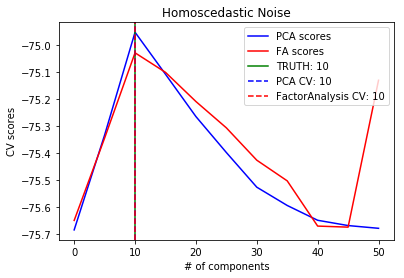

In [21]:
plt.plot([x for y, x in pca_scores_ho], [y for y, x in pca_scores_ho], 'b', label='PCA scores')
plt.plot([x for y, x in fa_scores_ho], [y for y, x in fa_scores_ho], 'r', label='FA scores')
plt.axvline(rank, color='g', label='TRUTH: %d' % rank, linestyle='-')
plt.axvline(test_homo["pca"][1], color='b', label='PCA CV: %d' %test_homo["pca"][1] , linestyle='--')
plt.axvline(test_homo["fa"][1], color='r', label='FactorAnalysis CV: %d' % test_homo["fa"][1], linestyle='--')

plt.xlabel("# of components")
plt.ylabel("CV scores")
plt.legend(loc="best")
plt.title("Homoscedastic Noise");

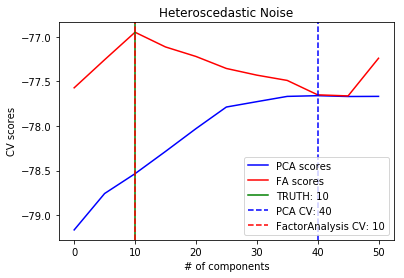

In [22]:
plt.plot([x for y, x in pca_scores_he], [y for y, x in pca_scores_he], 'b', label='PCA scores')
plt.plot([x for y, x in fa_scores_he], [y for y, x in fa_scores_he], 'r', label='FA scores')
plt.axvline(rank, color='g', label='TRUTH: %d' % rank, linestyle='-')
plt.axvline(test_hetero["pca"][1], color='b', label='PCA CV: %d' %test_hetero["pca"][1] , linestyle='--')
plt.axvline(test_hetero["fa"][1], color='r', label='FactorAnalysis CV: %d'%test_hetero["fa"][1], linestyle='--')

plt.xlabel("# of components")
plt.ylabel("CV scores")
plt.legend(loc="best")
plt.title("Heteroscedastic Noise");

# Research Notes

A simple linear continuous latent variable model for our data, $X$, is,
$$
x_i = Wh_i + \mu + \epsilon
$$

$h_i$ is a latent variable.
$\mu$ is some arbitrary offset vector.
$\epsilon \sim N(0, \boldsymbol{\Psi})$.

If we knew $h_i$, we could get the likelihood of our data 
$$
p(x_i | h_i ) = N(Wh_i + \mu, \boldsymbol{\Psi})
$$

If we wanted to infer our model from the observed data we would only require a posterior forthe latent variable $h_i$.
Because the likelihood is normally distributed we could assume the prior for the latent variable will also be normally distributed (the conjugate distribution for a Gaussia is itself).
$$
p(h_i) \sim N(0, \boldsymbol{I})
$$

Turns out this will give you a marginal distribution of the form
$$
p(x) = N(\mu, WW^T + \boldsymbol{\Psi})
$$

So we can model $x$ by specifying $\mu, \boldsymbol{\Psi}$.
Additional assumption with regards to the error covariance $\boldsymbol{\Psi}$
1. $\boldsymbol{\Psi} = \sigma^2 \boldsymbol{I}$
2. $\boldsymbol{\Psi} = $ diag$(\psi_1,...,\psi_n)$ 

In practice, the data points will not be confined precisely to a low-dimensional manifold, and we can interpret the departure of data points from the manifold as noise.
This leads to a generative view of models in which we first select a point within the manifold according to some latent variable distribution and then generate an observed data point by adding noise, drawn from some conditional distribution of the data variables given the latent variables.

Using a Gaussian distribution as a model for continuous latent and observed variables and using a linear-Gaussian dependence of the observed variables on the state of the latent variable leads to PCA and Factor Analysis.



## PCA - Maximum Variance Formulation

Our goal is to project the data onto a lower dimensionality space while maximizing the variance of the projected data.

Each data point $x_n$ is projected onto a scalar value $u_{1}^{T}x_n$.
$$
\bar{x} = \frac{1}{N} \Sigma^{N}_{n=1} x_n
$$
the variance is given by
$$
\frac{1}{N} \Sigma_{n=1}^{N} \left( u_{1}^{T}x_n - u^{T}_{1}\bar{x} \right) = u_{1}^{T}\boldsymbol{S}u_1
$$
$S$ is the covariance matrix,
$$
S = \frac{1}{N} \Sigma_{n=1}^{N} (x_n - \bar{x})(x_n - \bar{x})^T
$$

We maximize the projected variance $u_{i}^{T}Su_1$ with respect to the projection vector $u_1$ with the constraint that $u_{1}^{T}u_1 =1$.
Introduce a Lagrance multiplier $\lambda_1$,
$$
u_{1}^{T}Su_1 + \lambda_1 (1 - u_{1}^{T}u_1)
$$

set the derivative with respect to $u_1$ equal to zero, and you will hopefully come to the conclusion that there is a stationary point at $Su_1 = \lambda_1 u_1$.
Which impies that $u_1$ must be an eigenvector of $S$.

If we not multiply by $u^T$,
$$
U^T S u_1 = \lambda
$$
gives us the projected variance and the variance will be a maximum when we set $u_1$ equal to the eigenvector having the largest eigenvalue $\lambda_1$.

## PCA - Minimum Error Formulation

Complete orthonormal set of $D$-dimensional basis vectors that satisfy,
$$
u_{i}^{T}u_j = \delta_{ij}
$$

Because this basis is complete, each data point can be represented exactly as a linear combination of the basis vectors
$$
x_n = \Sigma^{D}_{i=1} \alpha_{ni} u_i 
$$

This transformation corresponds to a rotation of the coordinate system where the original $D$ components $\{ x_{n1}, ..., x_{nD}\}$ are replaced by an equivalent set $\{ \alpha_{n1}, ..., \alpha_{nD} \}$. 

Taking the inner product with $u_j$, and making use of the orthonormality constraint, $\alpha_{nj} = u^{T}_{j} x_n = x_{n}^{T} u_j$

To project to a lower space
$$
\tilde{x} = \Sigma_{i=1}^{M} z_{ni}u_i + \Sigma_{i = M + 1}^{D} b_i u_i
$$

So now our goal is to chose $z_{ni}, b_i, u_i,$ so as to minimize the distortion introduced by the dimensionality reduction.
$$
J = \frac{1}{N} \Sigma_{i=1}^{N} || x_n - \tilde{x}_n ||^2 
$$

Substituting for $\tilde{x}$ and setting the derivative with respect to $z_{nj}$ equal to zero, we get
$$
z_{nj} = x^{T}_{n}u_j
$$
Similarly, setting the derivative with respect to $b_j$ equal to zero, we get
$$
b_j = \bar{x}^T u_j
$$

So that
$$
x_n - \tilde{x}_n = \Sigma_{i=M+1}^{D} \left( (x_n - \bar{x})^T u_i \right)u_i
$$

Eventually, we can show that the distortion measure we want to minimize can be writen as 
$$
J = \frac{1}{N} \Sigma_{n=1}^{N} \Sigma_{i=M+1}^{D} \left( x^{T}_{n}u_i - \bar{x}^Tu_i \right)^2 = \Sigma_{i=M+1}^{D}u_{i}^{T} S u_i
$$

which again must be a constrained optimization.

In order to minimize the average square projection distance, we should chose the principal component subspace to pass through the mean of the data and to be aligned with the direction of maximum variance.

**Whitening:** Using PCA we can make a substantial normalization of the data to give it zero mean and unit covariance, this will decorrelate the different variables.

Rerwrite $SU = \lambda_i u_i$ as a matrix equation, which becomes
$$
SU = UL 
$$

So to whiten the data we make the transformation,
$$
x^{\prime}_{n} = L^{-1/2}U^T (x_n - \bar{x}) 
$$

This will make it so the the set $x^\prime$ has zero mean and its covariance will be unity.

## Probabilistic PCA

So now we are onto explore how PCA can be formulated in terms of a Maximum Likelihood solution of a probabilistic latent variable model.

Probabilistic PCA is an example of a linear-Gaussian framework, in which all marginal and conditional distributions are Gaussian.

Let's first introduce an explicit latent variable $z$ corresponding to the principal-component subspace.
For this latent variable we will use a prior Gaussian distribution $p(z)$, along with the Gaussian conditional distribution $p(x|z)$.

$$
p(z) \sim N(z | 0, I)
$$

and

$$
p(x|z) \sim N(x | Wz + \mu, \sigma^2 I)
$$

So the mean of $x$ will be a general linear function of $z$ governed by the $D \times M$ matrix W and the $D$-dimensional vector $\mu$.
Note that this factorizes with respect to the elements of $X$, essentially being a naive Bayes model.
The columns of $W$ turn out to span a linear subspace within the data space that corresponds to the principal subspace.
The other parameter is the variance of the conditional distribution.

The $D$-dimensional observed variable $x$ is defined by a linear transformation of the $M$-dimensional latent variable $z$ plus additive Gaussian noise

$$
x = Wz + \mu + \epsilon
$$

$z$ is an $M$-dimensional Gaussian latent varibale and $\epsilon$ is a $D$-dimensional zero-mean Gaussian-distributed noise variable with covariance $\sigma^2 I$.


Now suppose we want to use the maximum likelihood framework to obtain the values of $W, \mu,$ and $\sigma$.
To write down a likelihood function we need a marginal distribution of the observed variable.

$$
p(x) = \int dz \, p(x|z) p(z)
$$

Because this corresponds to a linear-Gaussian model, this marginal distribution is again Gaussian 

$$
p(x) \sim N(x | \mu, C)
$$

Where the $D \times D$ covariance matrix $C$ is defined as 
$$
C = W W^T + \sigma^2 I
$$

$$
E[x] = E[Wz + \mu + \epsilon] = \mu
$$

$$
Cov[x] = E[(Wz + \mu)(Wz + \mu)^T] = E[Wzz^TW^T] + E[\epsilon\epsilon^T] = WW^T + \sigma^2 I
$$

Using the fact that $z$ and $\epsilon$ are independent random variables, thus uncorrelated.

Finally, the posterior distribution is given by

$$
p(z|x) \sim N(z | M^{-1}W^T (x-\mu), \sigma^{-2}M)
$$

where $M = W^TW + \sigma^2 I$.

# EM Algorithm for PCA

For each data point there is a corresponding latent variable.

To derive an EM algorithm for PCA we will follow the framework for EM:
* Write a complete data log-likelihood.
* Calculate the expectation value of the log-likelihood with respect to the posterior distribution of the latent distribution using previous parameter values.
* Maximize the complete log-likelihood to generate new parameter values.

The complete log-likelihood can then be written as:

$$
\ln p(X,Z | \mu, W, \sigma^2) =
\Sigma_{n=1}^{N} \ln p(x_n|z_n) + \ln p(z_n)
$$

# Expectation Maximization Algorithm

Suppose we make some measurements which gives us some data points, and we know these results correspond to one of $K$ different models.

So we need a probabilistic model to infer which of these data points comes from which of the $K$ models,

$$
p(x|\theta) = p(x | z=k, \theta_k) p(z=k | \pi)
$$

Here $\theta = (\theta_1,...,\theta_k; \pi)$ denotes the parameters for model $k$ and $\pi$ the weights.

So one could now try to solve this problem by calculating the gradient ascent of the log-likelihood, $\mathcal{l}(\theta)$ to try and find the optimal $\theta$,

$$
\mathcal{l}(\theta) = \log p(D | \theta) = \Sigma_i \log p(x_i | \theta) = \Sigma_i \log \Sigma_{z=1}^{K} p(x_i | z=k, \theta_k)
$$

This is a bit troublesome as we have a sum inside the logs so what the Expectation Maximization algorithm helps us do is to move that sum outside the logarithm by trying to find a sequence of $\theta_0, \theta_1,...$ such that

$$
\mathcal{l}(\theta_0) \leq \mathcal{l}(\theta_1) \leq \mathcal{l}(\theta_2) \leq ...
$$

## Construction of the sequence and proof of its monotonicity

Let's define a function $Q$ such that,

$$
Q(\theta, \theta^\prime ) = \Sigma_i E_{p(z|x_i, \theta^\prime)} \left[ \log p(x_i, z|\theta) \right] + \Sigma_i H\left[ p(z|x_i, \theta^\prime) \right]
$$

$$
= \Sigma_i \Sigma_z p(z|x_i,\theta^\prime) \log p(x_i,z|\theta) - \Sigma_i \Sigma_z p(z|x_i,\theta^\prime) \log p(z|x_i,\theta)
$$

$H$ denotes the entropy and we define the series

$$
\theta_{t+1} = arg \, max_\theta Q(\theta,\theta_t)
$$

We will try to show the following:
1. $Q(\theta,\theta ) = \mathcal{l}(\theta )$.
2. $\mathcal{l}(\theta ) \geq Q(\theta, \theta^\prime)$ for every $\theta^\prime$.
3. $Q(\theta_{t+1}, \theta_t) \geq Q(\theta^\prime ,\theta_t )$ for every $\theta^\prime$.

So,
$$
\mathcal{l}(\theta_{t+1}) \geq Q(\theta_{t+1},\theta_t) \geq Q(\theta_t, \theta_t) = \mathcal{l}(\theta_t)
$$
which denotes monotonic convergence.


### Proof of 3
By $\theta_{t+1} = arg \, max_\theta Q(\theta,\theta_t)$ we show that $Q(\theta_{t+1}, \theta_t) \geq Q(\theta^\prime ,\theta_t )$ for every $\theta^\prime$.

### Proof of 2

Using Jensen's inequality, $\phi$ is a convex function here,

$$
E\left[ \phi(X) \right] \geq \phi(E\left[X\right])
$$

$$
\mathcal{l}(\theta) = \Sigma_i \log \Sigma_z p(x_i, z|\theta) = \Sigma_i \log \Sigma_z \frac{p(x_i,z|\theta)}{p(z|x_i,\theta^\prime)} p(z|x_i,\theta^\prime)
\geq
\Sigma_i \Sigma_z p(z|x_i,\theta^\prime) \log \frac{p(x_i,z|\theta)}{p(z|x_i,\theta^\prime)} = Q(\theta,\theta^\prime)
$$


### Proof of 1
$$
Q(\theta,\theta) = \Sigma_i \Sigma_z p(z|x_i,\theta) \log \frac{p(z|x_i,\theta)p(x_i|\theta)}{p(z|x_i,\theta)}
$$

$$
= \Sigma_i \Sigma_z p(z|x_i,\theta) \log p(x_i|\theta) 
$$

$$
= \Sigma_i \log p(x_i|\theta) = \mathcal{l}(\theta)
$$


The algorithm is called Expectation-Maximization algorithm because we alternate between the expectation step we perform to calculate $Q(\theta,\theta_t)$ and the maximization step to arrive at $\theta_{t+1}$. The parameter vector $\theta_0$ has to be initialized at the beginning. The local optimum which is found depends on the initial value.

In [7]:
import scipy as sp
import scipy.stats as st

In [67]:
class Gauss:
    def __init__(self, mu, cov, pi):
        self.mu = mu
        self.cov = cov
        self.pi = pi
        self.r = None
        
    def __repr__(self):
        return "Gauss({}, {}, {})".format(self.mu, self.cov, self.pi)
    
    def p(self, X): 
        sampling = st.multivariate_normal.pdf(X, mean=self.mu, cov=self.cov)
        npsampling = np.random.multivariate_normal(self.mu, self.cov, X.shape[0])
        return sampling
    
    
    def expectation(self, X):
        self.r = self.pi * self.p(X)
        
    def maximization(self, X):
        self.maximize_pi()
        self.maximize_mu(X)
        self.maximize_sigma(X)
        
    def maximize_pi(self):
        self.pi = self.r.mean()
        
    def maximize_mu(self, X):
        self.mu = X.T @ self.r / self.r.sum()
        
    def maximize_sigma(self, X):
        x_minus_mu_weighted = (X - self.mu) * self.r[sp.newaxis].T
        self.cov = x_minus_mu_weighted.T @ x_minus_mu_weighted / self.r.sum()
        

In [68]:
class Mixture:
    def __init__(self, components):
        self.components = list(components)

    def __repr__(self):
        return "{}({})".format(self.__class__.__name__, self.components)

    def __len__(self):
        return len(self.components)

    def __getitem__(self, item):
        return self.components[item]

    def expectation(self, X):
        for component in self.components:
            component.expectation(X)
        self._normalize_components()

    def _normalize_components(self):
        r_sum = sum(component.r for component in self)
        for component in self.components:
            component.r /= r_sum

    def maximization(self, X):
        for k, component in enumerate(self):
            component.maximization(X)

    def fit(self, X, n_steps=1000):
        for _ in range(n_steps):
            self.expectation(X)
            self.maximization(X)

In [83]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_classes = 3
X, y = make_blobs(n_samples=100, centers=n_classes)

mixture = Mixture(Gauss(sp.randn(2)*4, sp.eye(2), 1/n_classes) for _ in range(n_classes))

In [84]:
mixture.fit(X, n_steps=10000)

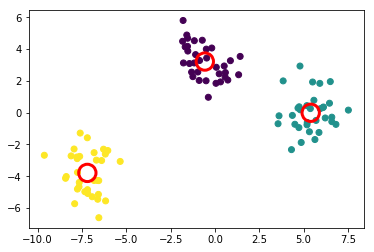

In [99]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(mixture.components[0].mu[0], mixture.components[0].mu[1], 
            s=300, facecolors='none', edgecolors='r', linewidths=3)

plt.scatter(mixture.components[1].mu[0], mixture.components[1].mu[1], 
            s=300, facecolors='none', edgecolors='r', linewidths=3)

plt.scatter(mixture.components[2].mu[0], mixture.components[2].mu[1], 
            s=300, facecolors='none', edgecolors='r', linewidths=3)